In [217]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

# extract Tesla from Yahoo Stocks Prices 
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 4, 30)

df = web.DataReader("TSLA", 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,430.700012,421.709991,424.500000,430.260010,9532100,430.260010
2020-01-03,454.000000,436.920013,440.500000,443.010010,17778500,443.010010
2020-01-06,451.559998,440.000000,440.470001,451.540009,10133000,451.540009
2020-01-07,471.630005,453.359985,461.399994,469.059998,17882100,469.059998
2020-01-08,498.489990,468.230011,473.700012,492.140015,31144300,492.140015


In [218]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-24,730.729980,698.179993,710.809998,725.150024,13237600,725.150024
2020-04-27,799.489990,735.000000,737.609985,798.750000,20681400,798.750000
2020-04-28,805.000000,756.690002,795.640015,769.119995,15222000,769.119995
2020-04-29,803.200012,783.159973,790.169983,800.510010,15812100,800.510010
2020-04-30,869.820007,765.000000,855.190002,777.210022,21096067,777.210022


In [219]:
df.dropna()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,430.700012,421.709991,424.500000,430.260010,9532100,430.260010
2020-01-03,454.000000,436.920013,440.500000,443.010010,17778500,443.010010
2020-01-06,451.559998,440.000000,440.470001,451.540009,10133000,451.540009
2020-01-07,471.630005,453.359985,461.399994,469.059998,17882100,469.059998
2020-01-08,498.489990,468.230011,473.700012,492.140015,31144300,492.140015
...,...,...,...,...,...,...
2020-04-24,730.729980,698.179993,710.809998,725.150024,13237600,725.150024
2020-04-27,799.489990,735.000000,737.609985,798.750000,20681400,798.750000
2020-04-28,805.000000,756.690002,795.640015,769.119995,15222000,769.119995


In [220]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [221]:
#code out the Rolling Mean:
close_px = df['Adj Close']
mavg = close_px.rolling(window=300).mean()

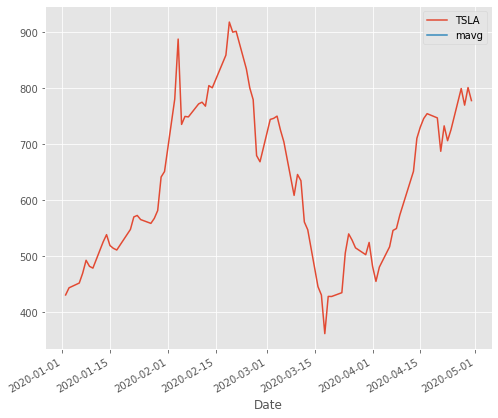

In [222]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='TSLA')
mavg.plot(label='mavg')
plt.legend()

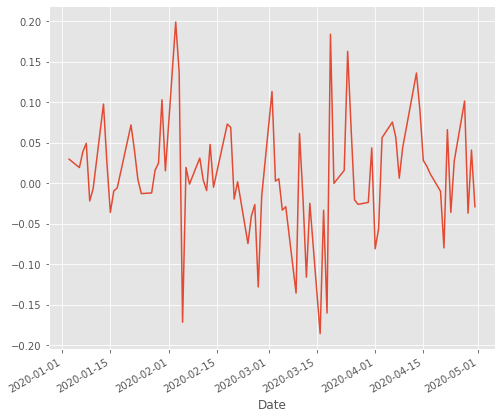

In [223]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return''Plotting the Return Rate' )

In [224]:
#This will returns a table of closing prices among the stocks prices from Yahoo Finance
dfcomp = web.DataReader(['AAPL', 'MAR', 'TSLA', 'AMZN', 'MSFT', 'UBER', 'NFLX'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.head()

Symbols,AAPL,MAR,TSLA,AMZN,MSFT,UBER,NFLX
Date,,,,,,,
2020-01-02,299.638885,150.884995,430.260010,1898.010010,160.182480,30.990000,329.809998
2020-01-03,296.725769,148.673859,443.010010,1874.969971,158.187927,31.370001,325.899994
2020-01-06,299.090149,146.751572,451.540009,1902.880005,158.596817,31.580000,335.829987
2020-01-07,297.683533,144.361160,469.059998,1906.859985,157.150772,32.810001,330.750000
2020-01-08,302.472137,146.143997,492.140015,1891.969971,159.653915,33.930000,339.260010


In [225]:
 dfcomp.tail()

Symbols,AAPL,MAR,TSLA,AMZN,MSFT,UBER,NFLX
Date,,,,,,,
2020-04-24,282.970001,80.709999,725.150024,2410.219971,174.550003,29.490000,424.989990
2020-04-27,283.170013,85.269997,798.750000,2376.000000,174.050003,30.080000,421.380005
2020-04-28,278.579987,87.419998,769.119995,2314.080078,169.809998,30.120001,403.829987
2020-04-29,287.730011,95.989998,800.510010,2372.709961,177.429993,31.370001,411.890015
2020-04-30,290.570007,89.379601,777.500000,2418.350098,178.119995,29.785000,416.589996


In [226]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
corr

Symbols,AAPL,MAR,TSLA,AMZN,MSFT,UBER,NFLX
Symbols,,,,,,,
AAPL,1.000000,0.460602,0.508508,0.732228,0.934013,0.414833,0.656542
MAR,0.460602,1.000000,0.489841,0.232382,0.423010,0.617676,0.201114
TSLA,0.508508,0.489841,1.000000,0.450896,0.521007,0.658187,0.432959
AMZN,0.732228,0.232382,0.450896,1.000000,0.781841,0.387579,0.768808
MSFT,0.934013,0.423010,0.521007,0.781841,1.000000,0.447275,0.697391
UBER,0.414833,0.617676,0.658187,0.387579,0.447275,1.000000,0.412285
NFLX,0.656542,0.201114,0.432959,0.768808,0.697391,0.412285,1.000000


Text(0, 0.5, 'Returns TSLA')

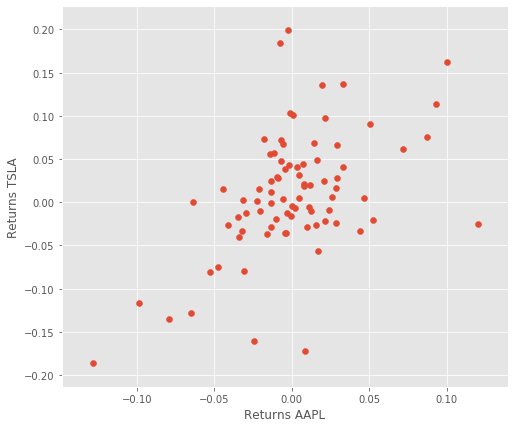

In [227]:
#Plot Apple and GE with ScatterPlot to view their return distributions.
plt.scatter(retscomp.AAPL, retscomp.TSLA)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns TSLA')
#title: Scatter Plot of TSLA and AAPL We can see here that there are slight positive correlations 
#among TSLA returns and Apple returns. 
#It seems like that the higher the Apple returns, the higher TSLA returns...KINDA...SORTA...

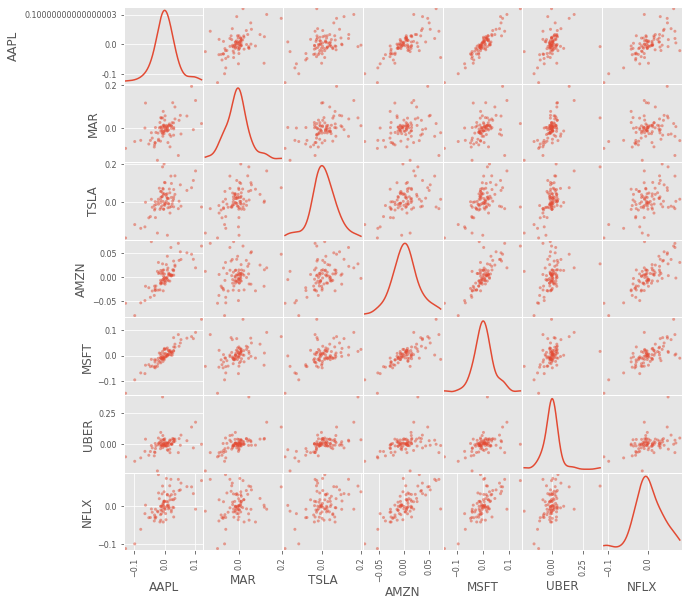

In [228]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

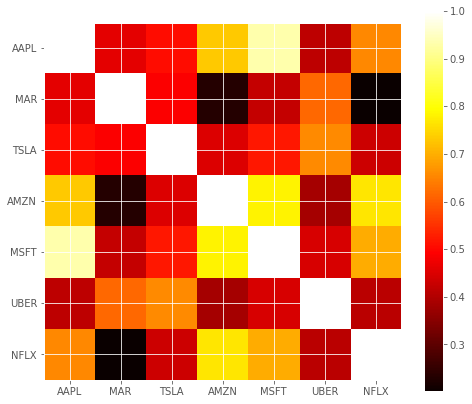

In [229]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);
#title: Heatmap of Correlations among competing stocks

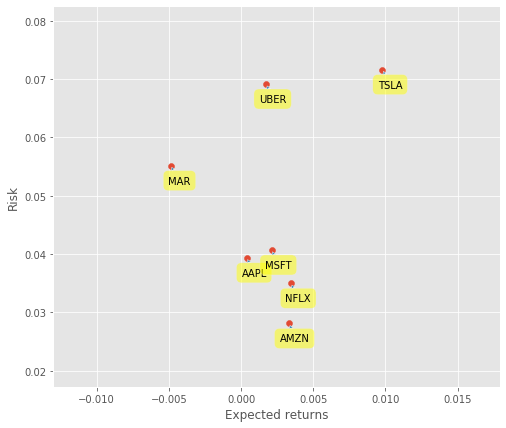

In [230]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = 'Fancy', connectionstyle = 'arc3,rad=0'))

In [231]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [232]:
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2020-01-02,430.260010,9532100,2.089439,1.356893
2020-01-03,443.010010,17778500,3.855440,0.569809
2020-01-06,451.540009,10133000,2.560127,2.513226
2020-01-07,469.059998,17882100,3.895028,1.660166
2020-01-08,492.140015,31144300,6.148652,3.892760


In [233]:
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2020-04-24,725.150024,13237600,4.488725,2.017421
2020-04-27,798.750000,20681400,8.073864,8.288935
2020-04-28,769.119995,15222000,6.281204,-3.333168
2020-04-29,800.510010,15812100,2.503409,1.308583
2020-04-30,777.210022,21096067,13.486703,-9.118439


In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import math
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [235]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

In [236]:
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

In [237]:
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=109)
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [239]:
from sklearn.neighbors import NearestNeighbors

In [240]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [241]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)
# results
# OUR OWN('The linear regression confidence is ', 0.96399641826551985)
# OUR OWN('The quadratic regression 2 confidence is ', 0.96492624557970319)
# OUR OWN('The quadratic regression 3 confidence is ', 0.9652082834532858)
# OUR OWN('The knn regression confidence is ', 0.92844658034790639)

In [242]:
# confidence level frame regression

forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan

# make it clfreg not just clf

In [243]:
forecast_set

array([760.38197454])

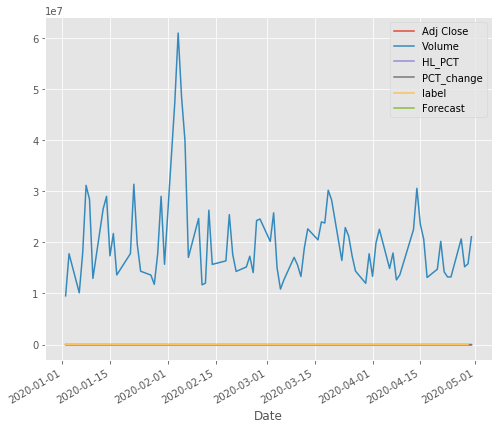

In [244]:
dfreg.plot()

In [245]:
# forecast_col.plot()

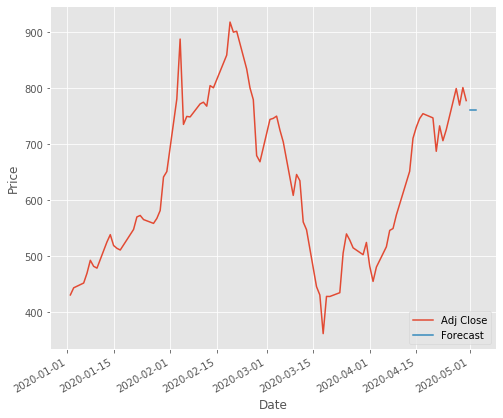

In [248]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(200).plot()
dfreg['Forecast'].tail(200).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()